**Objective:**

The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

**Tasks:**

**1. Data Preparation:**

* Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [51]:
heart_disease_data = pd.read_excel('/content/heart_disease.xlsx', sheet_name = 'Heart_disease')
heart_disease_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


**2. Exploratory Data Analysis (EDA):**

* Perform exploratory data analysis to understand the structure of the dataset.
* Check for missing values, outliers, and inconsistencies in the data.
* Visualize the distribution of features, including histograms, box plots, and correlation matrices.

**3. Feature Engineering:**

* If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

In [52]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [53]:
heart_disease_data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [54]:
# Check for missing values
heart_disease_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [55]:
missing_data_oldpeak = round((heart_disease_data['oldpeak'].isnull().sum()/len(heart_disease_data)) * 100, 4)
print(f'Percentage of missing data in oldpeak: {missing_data_oldpeak}%')

Percentage of missing data in oldpeak: 6.8282%


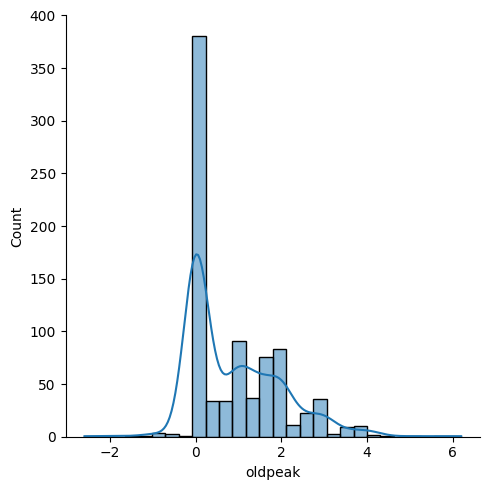

In [56]:
sea.displot(heart_disease_data['oldpeak'], kde = True)
plt.show()

In [57]:
print('mean', round(heart_disease_data['oldpeak'].mean(), 4))
print('median', round(heart_disease_data['oldpeak'].median(), 4))
print('skewness', round(heart_disease_data['oldpeak'].skew(), 4))

mean 0.8913
median 0.5
skewness 1.0217


Mean >> Median and skewness is moderate, so perform imputing using median as mean is influenced by outliers.

In [58]:
heart_disease_data['oldpeak_imputed'] = heart_disease_data['oldpeak'].fillna(heart_disease_data['oldpeak'].median())
heart_disease_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,oldpeak_imputed
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0,2.3
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0,0.0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0,0.4
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0,0.0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4,1.5
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4,3.0
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4,2.5
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4,0.5


In [59]:
numerical_cols = heart_disease_data.select_dtypes(include=[np.number]).columns
numerical_cols

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num',
       'oldpeak_imputed'],
      dtype='object')

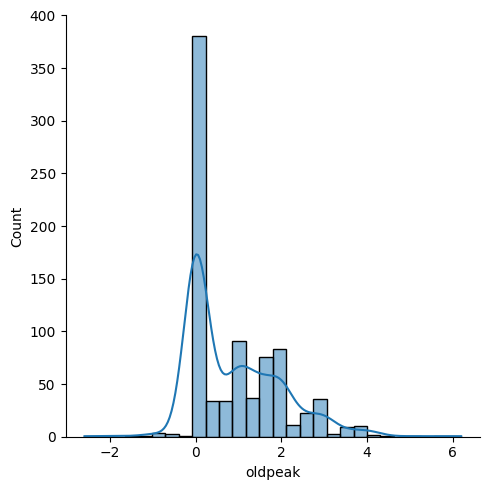

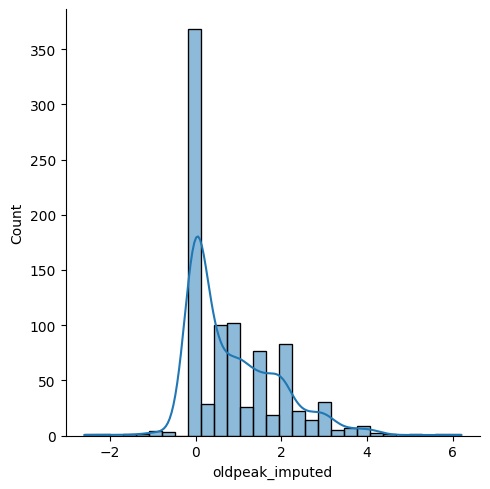

In [60]:
sea.displot(heart_disease_data['oldpeak'], kde = True)

sea.displot(heart_disease_data['oldpeak_imputed'], kde = True)

plt.show()

'oldpeak' data is moderatly skewed, testing sqrt transformation as the data contains zeros log transformation is not a godd choice.

In [61]:
heart_disease_data['oldpeak_sqrt'] = np.sqrt(heart_disease_data['oldpeak'])
heart_disease_data

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,oldpeak_imputed,oldpeak_sqrt
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0,2.3,1.516575
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0,0.0,0.000000
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0,0.4,0.632456
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0,0.0,0.000000
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0,1.5,1.224745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4,1.5,1.224745
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4,3.0,1.732051
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4,2.5,1.581139
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4,0.5,NaN


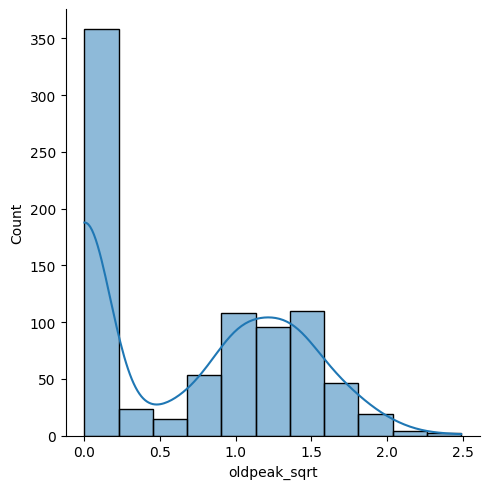

In [62]:
sea.displot(heart_disease_data['oldpeak_sqrt'], kde = True)
plt.show()

In [63]:
print('mean', round(heart_disease_data['oldpeak_sqrt'].mean(), 4))
print('median', round(heart_disease_data['oldpeak_sqrt'].median(), 4))
print('skewness', round(heart_disease_data['oldpeak_sqrt'].skew(), 4))

mean 0.6908
median 0.7746
skewness 0.2344


After sqrt transformation, the data is left skewed. Trying imputation using median and then performing reverse transformation.

In [64]:
heart_disease_data['oldpeak_sqrt'] = heart_disease_data['oldpeak_sqrt'].fillna(heart_disease_data['oldpeak_sqrt'].median())
heart_disease_data['oldpeak_reverse_sqrt'] = np.power(heart_disease_data['oldpeak_sqrt'], 2)
heart_disease_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,oldpeak_imputed,oldpeak_sqrt,oldpeak_reverse_sqrt
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0,2.3,1.516575,2.3
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0,0.0,0.000000,0.0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0,0.4,0.632456,0.4
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0,0.0,0.000000,0.0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0,1.5,1.224745,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4,1.5,1.224745,1.5
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4,3.0,1.732051,3.0
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4,2.5,1.581139,2.5
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4,0.5,0.774597,0.6


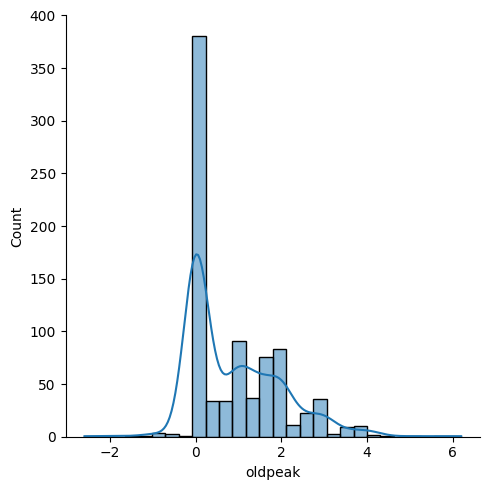

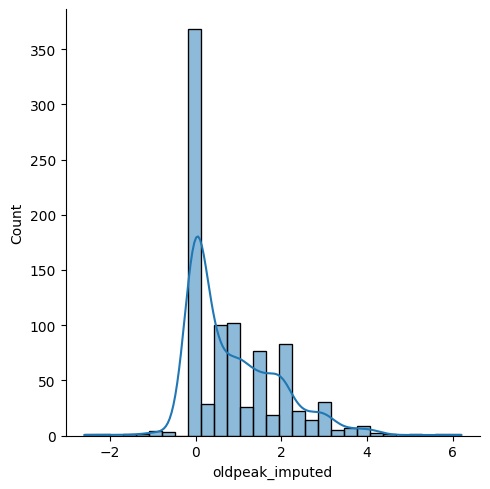

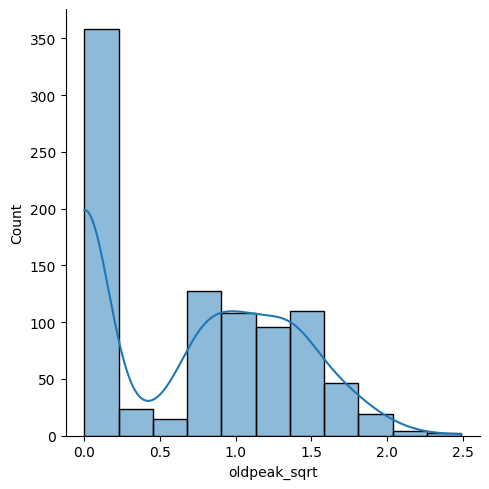

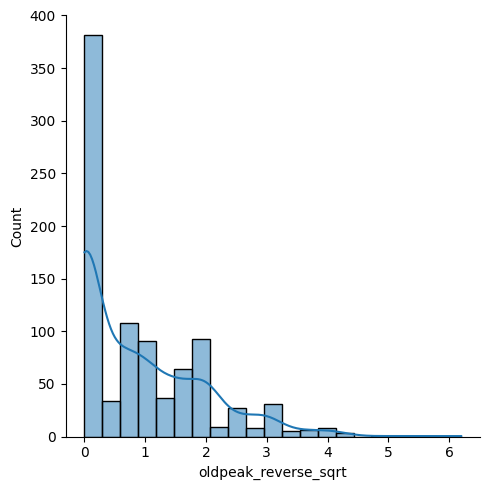

In [65]:
sea.displot(heart_disease_data['oldpeak'], kde = True)
sea.displot(heart_disease_data['oldpeak_imputed'], kde = True)
sea.displot(heart_disease_data['oldpeak_sqrt'], kde = True)
sea.displot(heart_disease_data['oldpeak_reverse_sqrt'], kde = True)
plt.show()

In [66]:
numerical_cols = heart_disease_data.select_dtypes(include=[np.number]).columns
numerical_cols

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num',
       'oldpeak_imputed', 'oldpeak_sqrt', 'oldpeak_reverse_sqrt'],
      dtype='object')

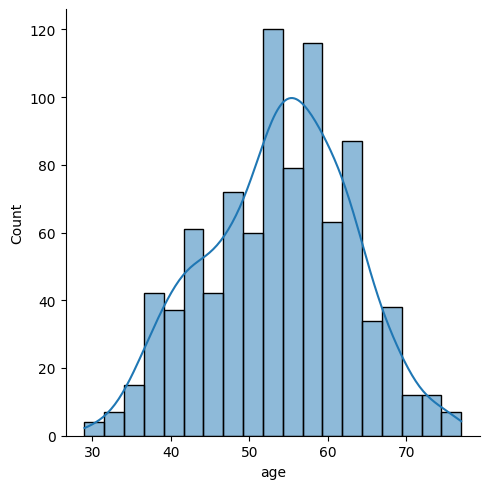

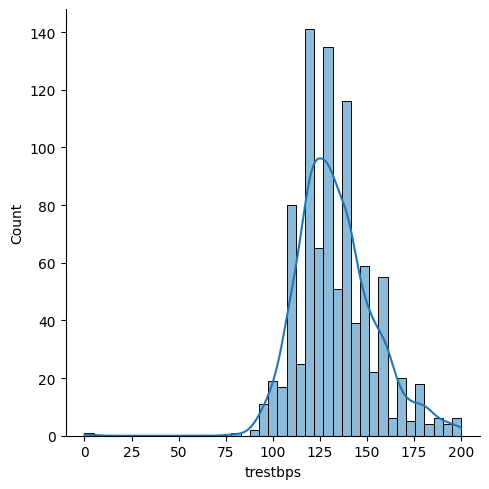

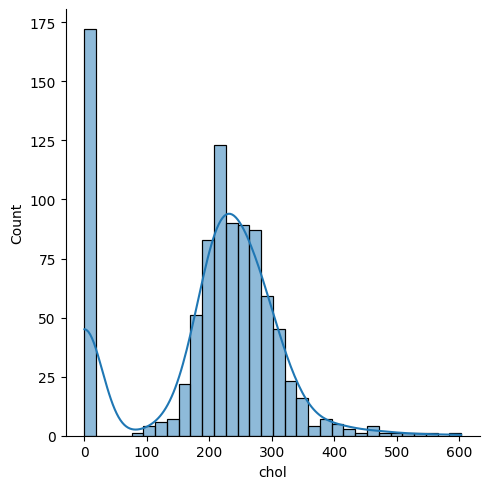

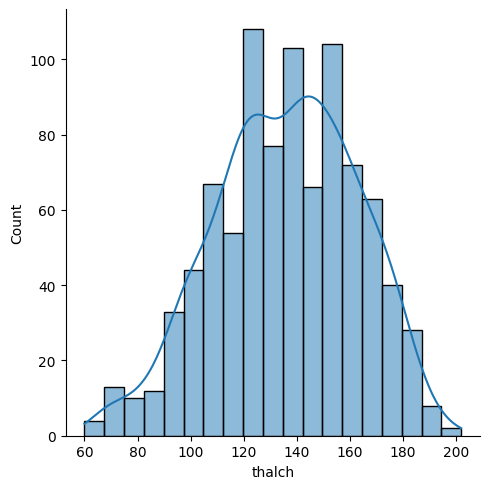

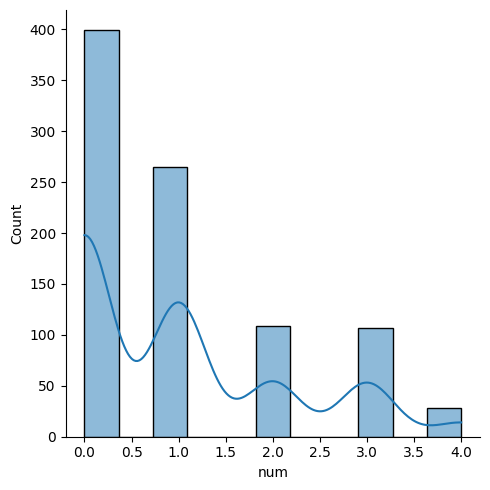

In [67]:
for nc in numerical_cols:
  if nc != 'oldpeak' and nc != 'oldpeak_imputed' and nc != 'oldpeak_sqrt' and nc != 'oldpeak_reverse_sqrt':
    sea.displot(heart_disease_data[nc], kde = True)
    plt.show()

In the 'chol' feature, there are several zero measurements. 'chol' is cholestrol measure, and for this case study, I am assuming zero measurments means not measured.

In [68]:
non_numerical_cols = heart_disease_data.select_dtypes(exclude=[np.number]).columns
non_numerical_cols

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [69]:
heart_disease_data['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [70]:
heart_disease_data['cp'].unique()

array(['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal'],
      dtype=object)

In [71]:
heart_disease_data['fbs'].unique()

array([ True, False])

In [72]:
heart_disease_data['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [73]:
heart_disease_data['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

There is an inconsistency in 'exang' (exercise induced angina) feature.

In [74]:
heart_disease_data['exang_corrected'] = heart_disease_data['exang']
heart_disease_data['exang_corrected'] = heart_disease_data['exang_corrected'].replace({'TURE': True, 'FALSE': False})
heart_disease_data['exang_corrected'].unique()

<ipython-input-74-aa93e9eedd4f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart_disease_data['exang_corrected'] = heart_disease_data['exang_corrected'].replace({'TURE': True, 'FALSE': False})


array([False,  True])

In [75]:
heart_disease_data['slope'].unique()

array(['downsloping', 'flat', 'upsloping'], dtype=object)

In [76]:
heart_disease_data['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

In [77]:
data_01 = heart_disease_data.copy()

In [78]:
data_01.drop(columns = ['oldpeak', 'oldpeak_sqrt', 'exang'], inplace = True)
data_01

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,slope,thal,num,oldpeak_imputed,oldpeak_reverse_sqrt,exang_corrected
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,downsloping,fixed defect,0,2.3,2.3,False
1,41,Male,atypical angina,135,203,False,normal,132,flat,fixed defect,0,0.0,0.0,False
2,57,Male,asymptomatic,140,192,False,normal,148,flat,fixed defect,0,0.4,0.4,False
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,flat,fixed defect,0,0.0,0.0,False
4,57,Male,asymptomatic,110,201,False,normal,126,flat,fixed defect,0,1.5,1.5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,upsloping,reversable defect,4,1.5,1.5,False
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,flat,reversable defect,4,3.0,3.0,True
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,downsloping,normal,4,2.5,2.5,True
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,downsloping,fixed defect,4,0.5,0.6,True


In [79]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [80]:
oh_encoder = OneHotEncoder(drop = 'first', sparse_output = False)
oh_sex = oh_encoder.fit_transform(data_01[['sex']])
oh_fbs = oh_encoder.fit_transform(data_01[['fbs']])
oh_exang_corrected = oh_encoder.fit_transform(data_01[['exang_corrected']])

In [81]:
oh_sex_df = pd.DataFrame(oh_sex, columns = ['sex_male'])
oh_fbs_df = pd.DataFrame(oh_fbs, columns = ['fbs_present'])
oh_exang_corrected_df = pd.DataFrame(oh_exang_corrected, columns = ['exang_present'])

In [82]:
label_encoder = LabelEncoder()
data_01['cp_encoded'] = label_encoder.fit_transform(data_01['cp'])
data_01['restecg_encoded'] = label_encoder.fit_transform(data_01['restecg'])
data_01['slope_encoded'] = label_encoder.fit_transform(data_01['slope'])
data_01['thal_encoded'] = label_encoder.fit_transform(data_01['thal'])
data_01

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,slope,thal,num,oldpeak_imputed,oldpeak_reverse_sqrt,exang_corrected,cp_encoded,restecg_encoded,slope_encoded,thal_encoded
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,downsloping,fixed defect,0,2.3,2.3,False,3,0,0,0
1,41,Male,atypical angina,135,203,False,normal,132,flat,fixed defect,0,0.0,0.0,False,1,1,1,0
2,57,Male,asymptomatic,140,192,False,normal,148,flat,fixed defect,0,0.4,0.4,False,0,1,1,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,flat,fixed defect,0,0.0,0.0,False,3,0,1,0
4,57,Male,asymptomatic,110,201,False,normal,126,flat,fixed defect,0,1.5,1.5,True,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,upsloping,reversable defect,4,1.5,1.5,False,0,1,2,2
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,flat,reversable defect,4,3.0,3.0,True,0,2,1,2
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,downsloping,normal,4,2.5,2.5,True,2,0,0,1
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,downsloping,fixed defect,4,0.5,0.6,True,2,2,0,0


In [83]:
data_01.drop(columns = ['sex', 'cp', 'fbs', 'restecg', 'exang_corrected', 'slope', 'thal', 'num'], inplace = True)
data_01

,age,trestbps,chol,thalch,oldpeak_imputed,oldpeak_reverse_sqrt,cp_encoded,restecg_encoded,slope_encoded,thal_encoded
0,63,145,233,150,2.3,2.3,3,0,0,0
1,41,135,203,132,0.0,0.0,1,1,1,0
2,57,140,192,148,0.4,0.4,0,1,1,0
3,52,118,186,190,0.0,0.0,3,0,1,0
4,57,110,201,126,1.5,1.5,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,120,1.5,1.5,0,1,2,2
904,62,166,170,120,3.0,3.0,0,2,1,2
905,56,170,0,123,2.5,2.5,2,0,0,1
906,56,144,208,105,0.5,0.6,2,2,0,0


In [84]:
data_01 = pd.concat([data_01, oh_sex_df, oh_fbs_df, oh_exang_corrected_df], axis = 1)
data_01

,age,trestbps,chol,thalch,oldpeak_imputed,oldpeak_reverse_sqrt,cp_encoded,restecg_encoded,slope_encoded,thal_encoded,sex_male,fbs_present,exang_present
0,63,145,233,150,2.3,2.3,3,0,0,0,1.0,1.0,0.0
1,41,135,203,132,0.0,0.0,1,1,1,0,1.0,0.0,0.0
2,57,140,192,148,0.4,0.4,0,1,1,0,1.0,0.0,0.0
3,52,118,186,190,0.0,0.0,3,0,1,0,1.0,0.0,0.0
4,57,110,201,126,1.5,1.5,0,1,1,0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,120,1.5,1.5,0,1,2,2,1.0,0.0,0.0
904,62,166,170,120,3.0,3.0,0,2,1,2,1.0,0.0,1.0
905,56,170,0,123,2.5,2.5,2,0,0,1,1.0,0.0,1.0
906,56,144,208,105,0.5,0.6,2,2,0,0,1.0,1.0,1.0


In [85]:
data_01.rename(columns = {'cp_encoded' : 'cp', 'restecg_encoded' : 'restecg', 'slope_encoded' : 'slope',	'thal_encoded' : 'thal',	'sex_male' : 'sex',	'fbs_present' : 'fbs',	'exang_present' : 'exang'}, inplace = True)
data_01

,age,trestbps,chol,thalch,oldpeak_imputed,oldpeak_reverse_sqrt,cp,restecg,slope,thal,sex,fbs,exang
0,63,145,233,150,2.3,2.3,3,0,0,0,1.0,1.0,0.0
1,41,135,203,132,0.0,0.0,1,1,1,0,1.0,0.0,0.0
2,57,140,192,148,0.4,0.4,0,1,1,0,1.0,0.0,0.0
3,52,118,186,190,0.0,0.0,3,0,1,0,1.0,0.0,0.0
4,57,110,201,126,1.5,1.5,0,1,1,0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,120,1.5,1.5,0,1,2,2,1.0,0.0,0.0
904,62,166,170,120,3.0,3.0,0,2,1,2,1.0,0.0,1.0
905,56,170,0,123,2.5,2.5,2,0,0,1,1.0,0.0,1.0
906,56,144,208,105,0.5,0.6,2,2,0,0,1.0,1.0,1.0


**4. Decision Tree Classification:**

* Split the dataset into training and testing sets (e.g., using an 80-20 split).
* Implement a Decision Tree Classification model using a library like scikit-learn.
* Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

In [86]:
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [87]:
x_train, x_test, y_train, y_test = tts(data_01, heart_disease_data['num'], test_size = 0.2, random_state = 42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(726, 13)
(726,)
(182, 13)
(182,)


In [88]:
model01 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_split = 3, random_state = 42)
model01.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=3, random_state=42)

In [89]:
y_pred_01 = model01.predict(x_test)

In [90]:
print('Accuracy:', round(accuracy_score(y_test, y_pred_01), 4))
print('Precision:', round(precision_score(y_test, y_pred_01, average = 'macro'), 4))
print('Recall:', round(recall_score(y_test, y_pred_01, average = 'macro'), 4))
print('F1-score:', round(f1_score(y_test, y_pred_01, average = 'macro'), 4))
print('ROC-AUC:', round(roc_auc_score(y_test, model01.predict_proba(x_test), multi_class = 'ovr'), 4))

Accuracy: 0.5714
Precision: 0.2699
Recall: 0.3178
F1-score: 0.2919
ROC-AUC: 0.7399


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [91]:
print("Feature importance:", model01.feature_importances_)

Feature importance: [0.1492486  0.04360232 0.1321949  0.0273891  0.         0.
 0.56158294 0.         0.         0.         0.         0.
 0.08598216]


The key metrics of 'gini' model01,
* Accuracy: 57% of all (positives + negatives) predictions are correct
* Precision: about 27% of the predicted positives are correct
* Recall: about 31% of the actual positives are not missed
* F1-score: indicates a moderate balance between precision and recall
* ROC-AUC (Reciver Operating Charecteristic - Area Under Curve): plots True Positive rate (Recall) vs False Positive rate. This score evaluates how well a model orders based on their predicted probabilities. In this model in about 74% of the cases, the positive sample chosen randomly will be ranked or ordered or assigned a higher predicted probability compared to a randomly chosen negative sample.

**5. Hyperparameter Tuning:**

* Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
p_grid = {'max_depth': [1, 3, 5, 7, 10]}
grid_search = GridSearchCV(model01, p_grid, cv = 5)
grid_search.fit(x_train, y_train)

print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'max_depth': 1}


Plot Validation Curve

In [94]:
from sklearn.model_selection import validation_curve

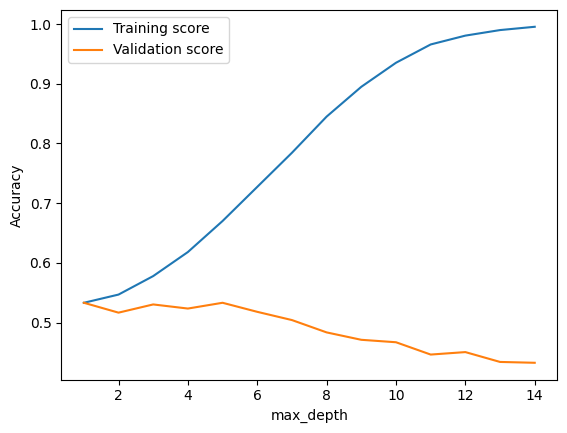

In [95]:
depths = range(1, 15)
train_scores, val_scores = validation_curve(DecisionTreeClassifier(random_state = 42), x_train, y_train,
    param_name = "max_depth", param_range = depths, cv = 5)

plt.plot(depths, np.mean(train_scores, axis=1), label = "Training score")
plt.plot(depths, np.mean(val_scores, axis=1), label = "Validation score")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

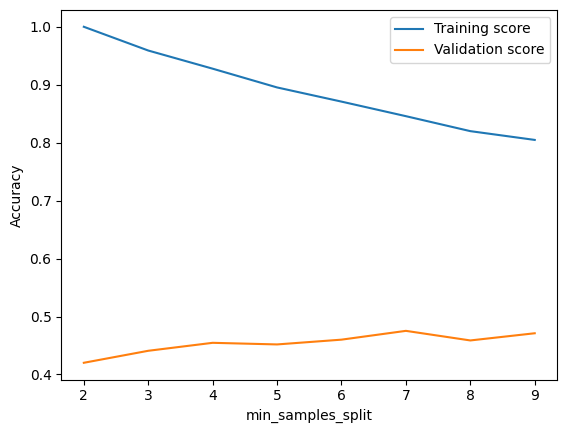

In [96]:
samples = range(1, 10)
train_scores, val_scores = validation_curve(DecisionTreeClassifier(random_state = 42), x_train, y_train,
param_name = "min_samples_split", param_range = samples, cv = 5)

plt.plot(samples, np.mean(train_scores, axis = 1), label = "Training score")
plt.plot(samples, np.mean(val_scores, axis = 1), label = "Validation score")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

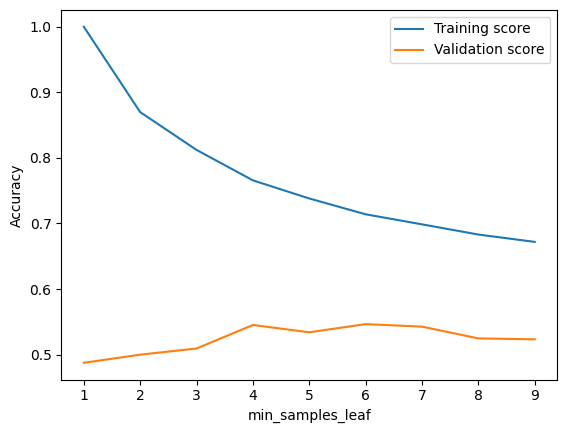

In [97]:
samples = range(1, 10)
train_scores, val_scores = validation_curve(DecisionTreeClassifier(random_state = 42), x_train, y_train,
    param_name = "min_samples_leaf", param_range = samples, cv = 15)

plt.plot(samples, np.mean(train_scores, axis = 1), label = "Training score")
plt.plot(samples, np.mean(val_scores, axis = 1), label = "Validation score")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [104]:
model02 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_split = 3, min_samples_leaf = 4, random_state = 42)
model02.fit(x_train, y_train)

y_pred_02 = model02.predict(x_test)

In [105]:
print('Accuracy:', round(accuracy_score(y_test, y_pred_02), 4))
print('Precision:', round(precision_score(y_test, y_pred_02, average = 'macro'), 4))
print('Recall:', round(recall_score(y_test, y_pred_02, average = 'macro'), 4))
print('F1-score:', round(f1_score(y_test, y_pred_02, average = 'macro'), 4))
print('ROC-AUC:', round(roc_auc_score(y_test, model02.predict_proba(x_test), multi_class = 'ovr'), 4))

Accuracy: 0.5604
Precision: 0.2212
Recall: 0.2791
F1-score: 0.2464
ROC-AUC: 0.6374


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [100]:
print('Train Accuracy', model02.score(x_train, y_train))
print('Test Accuracy', model02.score(x_test, y_test))

Train Accuracy 0.6253443526170799
Test Accuracy 0.5439560439560439


In [101]:
print("Feature importance:", model02.feature_importances_)

Feature importance: [0.15358122 0.04775466 0.16648618 0.04200375 0.03834705 0.01453243
 0.37281758 0.         0.01134973 0.03972915 0.03947212 0.
 0.07392612]


In [102]:
model03 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_split = 3, min_samples_leaf = 4, random_state = 42)
model03.fit(x_train, y_train)

y_pred_03 = model03.predict(x_test)

In [103]:
print('Accuracy:', round(accuracy_score(y_test, y_pred_03), 4))
print('Precision:', round(precision_score(y_test, y_pred_03, average = 'macro'), 4))
print('Recall:', round(recall_score(y_test, y_pred_03, average = 'macro'), 4))
print('F1-score:', round(f1_score(y_test, y_pred_03, average = 'macro'), 4))
print('ROC-AUC:', round(roc_auc_score(y_test, model03.predict_proba(x_test), multi_class = 'ovr'), 4))

Accuracy: 0.5604
Precision: 0.2212
Recall: 0.2791
F1-score: 0.2464
ROC-AUC: 0.6374


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Comparing two criterions: 'gini', 'entropy'
* Accuracy is slightly higher in 'entropy' model but both of them are poor.
* Precision is predition of positives correctly is slightly better in 'gini' model, but both models perform badly.
* Recall is not missing the actual poritives, 'gini' is better but both models do not perform well.
* F1-score, is a balance between Precision and Recall (one metric instead of two). It follows the same pattern as briefed in the above pointers
* ROC-AUC is a positive sample chosen randomly will be ranked or ordered or assigned a higher predicted probability compared to a randomly chosen negative sample.

Note: Both these models do not perform well.


**6. Model Evaluation and Analysis:**

* Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
* Visualize the decision tree structure to understand the rules learned by the model and identify important features

In [106]:
from sklearn.tree import plot_tree

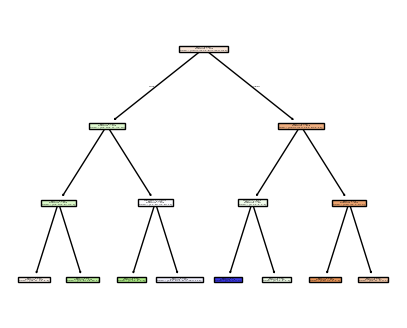

In [124]:
# criterion: 'gini, max_depth = 3, min_samples_split = 3
plt.figure(figsize = (5, 4))
plot_tree(model01, filled = True, feature_names = x_train.columns)
plt.show()

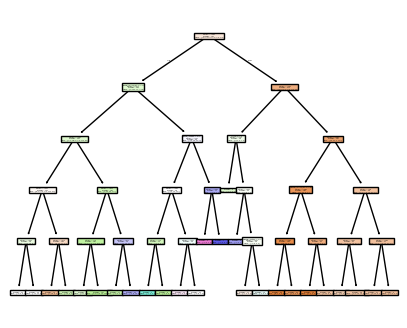

In [123]:
# criterion = 'gini', max_depth = 5, min_samples_split = 3, min_samples_leaf = 4
plt.figure(figsize = (5, 4))
plot_tree(model02, filled = True, feature_names = x_train.columns)
plt.show()

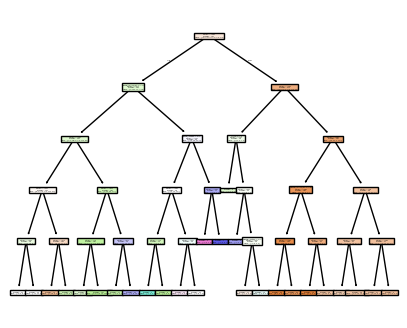

In [122]:
# criterion = 'entropy', max_depth = 5, min_samples_split = 3, min_samples_leaf = 4
plt.figure(figsize = (5, 4))
plot_tree(model03, filled = True, feature_names = x_train.columns)
plt.show()